In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [78]:
train_data_hdb = pd.read_csv('./data/hdb_train.csv')
test_data_hdb = pd.read_csv('./data/hdb_test.csv')

In [79]:
train_data_hdb = train_data_hdb.drop(['index'],axis=1)
test_data_hdb = test_data_hdb.drop(['index'],axis=1)
print train_data_hdb.shape
print test_data_hdb.shape
print "List of Columns:\n", ", ".join(train_data_hdb.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_hdb.columns), "\n\n"

(759992, 14)
(3766, 13)
List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, resale_price, storey_range, street_name, town, latitude, longitude, postal_code, floor 


List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, storey_range, street_name, town, latitude, longitude, postal_code, floor 




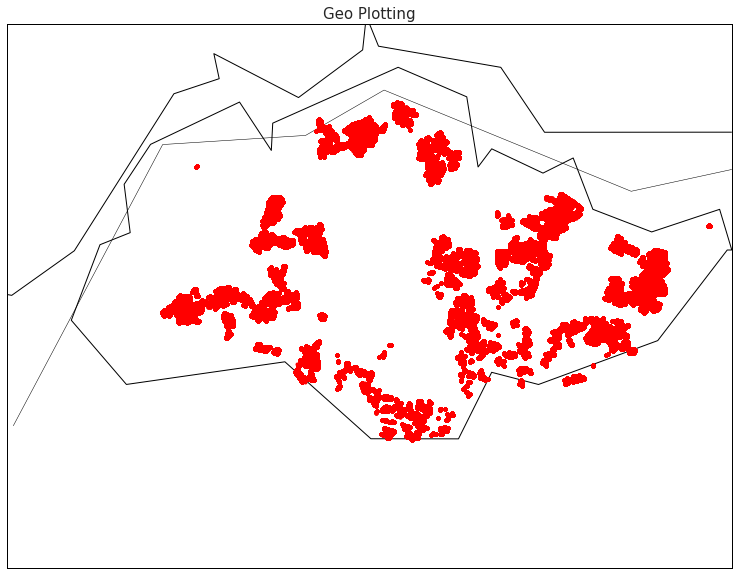

In [80]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_hdb[cols]

fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.3, lon_0=103.8)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
m.plot(x, y, 'ro', markersize=4)

plt.title("Geo Plotting")
plt.show()

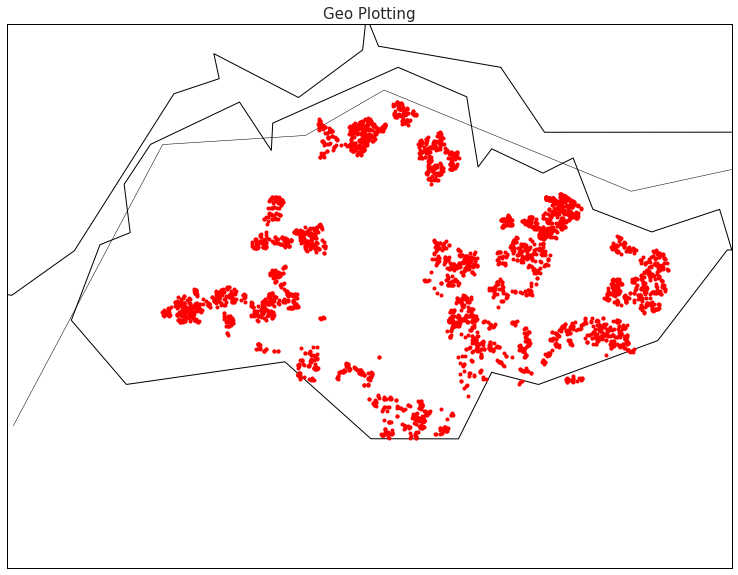

In [81]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20, 10))

m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_hdb['longitude'].values
lats = test_data_hdb['latitude'].values
x,y = m(lons, lats)

m.plot(x, y, 'ro', markersize=4)
    
plt.title("Geo Plotting")
plt.show()

In [82]:
train_data_hdb = train_data_hdb.drop(train_data_hdb[(train_data_hdb.latitude>1.4) &\
                                             (train_data_hdb.latitude<1.6) & (train_data_hdb.longitude>103.6) & (train_data_hdb.longitude<103.72)].index)

In [83]:
train_data_hdb.shape

(759928, 14)

In [84]:
train_data_hdb = train_data_hdb.drop(train_data_hdb[train_data_hdb.longitude >103.98].index)

In [85]:
train_data_hdb.shape

(759789, 14)

In [86]:
#train_data_hdb.flat_model.value_counts()
t = train_data_hdb.flat_model.unique()
t.sort()
#t1 = test_data_hdb.flat_model.unique()
#t1.sort()
#print (train_data_hdb['flat_model'].astype('category').cat.codes).unique()
print t
flat_model_dict={}
for i in range(len(t)):
    flat_model_dict[t[i]] = i+1
print flat_model_dict

train_data_hdb['flat_model'] = train_data_hdb.flat_model.apply(lambda x : flat_model_dict[x])
#print train_data_hdb.flat_model.value_counts()
#print test_data_hdb.flat_model.value_counts()
#train_data_hdb.flat_model.unique().sort() == test_data_hdb.flat_model.unique().sort()

['2-ROOM' 'ADJOINED FLAT' 'APARTMENT' 'DBSS' 'IMPROVED'
 'IMPROVED-MAISONETTE' 'MAISONETTE' 'MODEL A' 'MODEL A-MAISONETTE'
 'MODEL A2' 'MULTI GENERATION' 'NEW GENERATION' 'PREMIUM APARTMENT'
 'PREMIUM APARTMENT LOFT' 'PREMIUM MAISONETTE' 'SIMPLIFIED' 'STANDARD'
 'TERRACE' 'TYPE S1' 'TYPE S2']
{'MAISONETTE': 7, 'MODEL A2': 10, 'APARTMENT': 3, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MULTI GENERATION': 11, 'PREMIUM APARTMENT': 13, '2-ROOM': 1, 'TYPE S1': 19, 'NEW GENERATION': 12, 'STANDARD': 17, 'TYPE S2': 20, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'SIMPLIFIED': 16, 'TERRACE': 18, 'PREMIUM APARTMENT LOFT': 14, 'ADJOINED FLAT': 2, 'PREMIUM MAISONETTE': 15, 'DBSS': 4}


In [87]:
t = train_data_hdb.flat_type.unique()
t.sort()
print t
flat_type_dict={}
for i in range(len(t)):
    flat_type_dict[t[i]] = i+1
print flat_type_dict

train_data_hdb['flat_type'] = train_data_hdb.flat_type.apply(lambda x : flat_type_dict[x])

['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
{'3 ROOM': 3, '4 ROOM': 4, '1 ROOM': 1, 'MULTI GENERATION': 7, 'EXECUTIVE': 6, '5 ROOM': 5, '2 ROOM': 2}


In [88]:
t = train_data_hdb.block.unique()
t1 = test_data_hdb.block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
block_dict={}
for i in range(len(t)):
    block_dict[t[i]] = i+1
#print block_dict

train_data_hdb['block'] = train_data_hdb.block.apply(lambda x : block_dict[x])
test_data_hdb['block'] = test_data_hdb.block.apply(lambda x : block_dict[x])


2190 1380
['1' '10' '100' ... '99A' '99B' '99C'] ['333' '308A' '577' ... '829' '398' '827']


In [89]:
train_data_hdb.month = train_data_hdb.month.apply(lambda x : int(x.replace("-","")))
test_data_hdb.month = test_data_hdb.month.apply(lambda x : int(x.replace("-","")))
print train_data_hdb.month.unique()
print test_data_hdb.month.unique()

t = train_data_hdb.month.unique()
t1 = test_data_hdb.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_hdb['month'] = train_data_hdb.month.apply(lambda x : month_dict[x])
test_data_hdb['month'] = test_data_hdb.month.apply(lambda x : month_dict[x])

[199001 199002 199003 199004 199005 199006 199007 199008 199009 199010
 199011 199012 199101 199102 199103 199104 199105 199106 199107 199108
 199109 199110 199111 199112 199201 199202 199203 199204 199205 199206
 199207 199208 199209 199210 199211 199212 199301 199302 199303 199304
 199305 199306 199307 199308 199309 199310 199311 199312 199401 199402
 199403 199404 199405 199406 199407 199408 199409 199410 199411 199412
 199501 199502 199503 199504 199505 199506 199507 199508 199509 199510
 199511 199512 199601 199602 199603 199604 199605 199606 199607 199608
 199609 199610 199611 199612 199701 199702 199703 199704 199705 199706
 199707 199708 199709 199710 199711 199712 199801 199802 199803 199804
 199805 199806 199807 199808 199809 199810 199811 199812 199901 199902
 199903 199904 199905 199906 199907 199908 199909 199910 199911 199912
 200001 200002 200003 200004 200005 200006 200007 200008 200009 200010
 200011 200012 200101 200102 200103 200104 200105 200106 200107 200108
 20010

In [90]:
t = train_data_hdb.storey_range.unique()
t1 = test_data_hdb.storey_range.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
storey_dict={}
for i in range(len(t)):
    storey_dict[t[i]] = i+1
#print block_dict

train_data_hdb['storey_range'] = train_data_hdb.storey_range.apply(lambda x : storey_dict[x])
test_data_hdb['storey_range'] = test_data_hdb.storey_range.apply(lambda x : storey_dict[x])

25 15
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48'
 '49 TO 51'] ['10 TO 12' '07 TO 09' '04 TO 06' '01 TO 03' '13 TO 15' '16 TO 18'
 '28 TO 30' '25 TO 27' '19 TO 21' '22 TO 24' '34 TO 36' '40 TO 42'
 '31 TO 33' '37 TO 39' '43 TO 45']


In [91]:
print train_data_hdb.town.unique()
print test_data_hdb.town.unique()

print train_data_hdb.street_name.unique()
print test_data_hdb.street_name.unique()

t = train_data_hdb.town.unique()
t1 = test_data_hdb.town.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
town_dict={}
for i in range(len(t)):
    town_dict[t[i]] = i+1
#print block_dict

train_data_hdb['town'] = train_data_hdb.town.apply(lambda x : town_dict[x])
test_data_hdb['town'] = test_data_hdb.town.apply(lambda x : town_dict[x])

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'BEDOK STH AVE 1'
 'NEW UPP CHANGI RD' 'BEDOK NTH AVE 4' 'BEDOK NTH RD' 'BEDOK STH AVE 3'
 'BEDOK STH AVE 2

In [92]:
t = train_data_hdb.street_name.unique()
t1 = test_data_hdb.street_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
street_name_dict={}
for i in range(len(t)):
    street_name_dict[t[i]] = i+1
#print block_dict

train_data_hdb['street_name'] = train_data_hdb.street_name.apply(lambda x : street_name_dict[x])
test_data_hdb['street_name'] = test_data_hdb.street_name.apply(lambda x : street_name_dict[x])

540 462
['ADMIRALTY DR' 'ADMIRALTY LINK' 'AH HOOD RD' 'ALEXANDRA RD'
 'ALJUNIED CRES' 'ALJUNIED RD' 'ANCHORVALE DR' 'ANCHORVALE LANE'
 'ANCHORVALE LINK' 'ANCHORVALE RD' 'ANG MO KIO AVE 1' 'ANG MO KIO AVE 10'
 'ANG MO KIO AVE 2' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 9' 'ANG MO KIO ST 11' 'ANG MO KIO ST 21'
 'ANG MO KIO ST 31' 'ANG MO KIO ST 32' 'ANG MO KIO ST 52' 'BAIN ST'
 'BALAM RD' 'BANGKIT RD' 'BEACH RD' 'BEDOK CTRL' 'BEDOK NTH AVE 1'
 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 4' 'BEDOK NTH RD'
 'BEDOK NTH ST 1' 'BEDOK NTH ST 2' 'BEDOK NTH ST 3' 'BEDOK NTH ST 4'
 'BEDOK RESERVOIR RD' 'BEDOK RESERVOIR VIEW' 'BEDOK STH AVE 1'
 'BEDOK STH AVE 2' 'BEDOK STH AVE 3' 'BEDOK STH RD' 'BENDEMEER RD'
 'BEO CRES' 'BISHAN ST 11' 'BISHAN ST 12' 'BISHAN ST 13' 'BISHAN ST 22'
 'BISHAN ST 23' 'BISHAN ST 24' 'BOON KENG RD' 'BOON LAY AVE' 'BOON LAY DR'
 'BOON LAY PL' 'BOON TIONG RD' 'BRIGHT HILL DR' 'BT BATOK CTRL'
 'B

In [94]:
train_data_hdb.head(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,740,5,1,31.0,1977,1,9000.0,6,11,1,1.365029,103.845300,562309,11
1,740,5,1,31.0,1977,1,6000.0,3,11,1,1.365029,103.845300,562309,5
2,740,5,1,31.0,1977,1,8000.0,6,11,1,1.365029,103.845300,562309,11
3,740,5,1,31.0,1977,1,6000.0,5,11,1,1.365029,103.845300,562309,8
4,403,12,3,73.0,1976,1,47200.0,3,11,1,1.366197,103.841505,560216,5
5,388,12,3,67.0,1977,1,46000.0,1,14,1,1.369197,103.841667,560211,2
6,346,12,3,67.0,1977,1,42000.0,5,14,1,1.368446,103.844516,560202,8
7,467,12,3,67.0,1977,1,38000.0,6,14,1,1.366824,103.836491,560235,11
8,467,12,3,67.0,1977,1,40000.0,3,14,1,1.366824,103.836491,560235,5
9,462,12,3,67.0,1977,1,47000.0,1,14,1,1.368346,103.837196,560232,2


In [95]:
t = train_data_hdb.postal_code.unique()
t1 = test_data_hdb.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_hdb['postal_code'] = train_data_hdb.postal_code.apply(lambda x : postal_dict[x])
test_data_hdb['postal_code'] = test_data_hdb.postal_code.apply(lambda x : postal_dict[x])


8759 2821
[ 50004  50032  50532 ... 824637 824642 825195] [560333 561308 560577 ... 760828 760877 760666]


In [96]:
t = train_data_hdb.latitude.unique()
t1 = test_data_hdb.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_hdb['latitude'] = train_data_hdb.latitude.apply(lambda x : lat_dict[x])
test_data_hdb['latitude'] = test_data_hdb.latitude.apply(lambda x : lat_dict[x])


8765 2821
[1.27037951 1.27091871 1.27140883 ... 1.45647432 1.45654601 1.45707122] [1.36134256 1.36547952 1.37178733 ... 1.41519093 1.41390219 1.41899847]


In [97]:
t = train_data_hdb.longitude.unique()
t1 = test_data_hdb.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_hdb['longitude'] = train_data_hdb.longitude.apply(lambda x : long_dict[x])
test_data_hdb['longitude'] = test_data_hdb.longitude.apply(lambda x : long_dict[x])


8764 2821
[103.68522842 103.68523426 103.68593081 ... 103.96439861 103.96472179
 103.96491543] [103.85169862 103.84408665 103.85585437 ... 103.83290169 103.83545393
 103.840568  ]


In [98]:
train_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,740,5,1,31.0,1977,1,9000.0,6,11,1,4745,4429,4824,11
1,740,5,1,31.0,1977,1,6000.0,3,11,1,4745,4429,4824,5
2,740,5,1,31.0,1977,1,8000.0,6,11,1,4745,4429,4824,11
3,740,5,1,31.0,1977,1,6000.0,5,11,1,4745,4429,4824,8
4,403,12,3,73.0,1976,1,47200.0,3,11,1,4824,4236,4547,5


In [99]:
train_data_hdb['resale_price'].describe()

count    7.597890e+05
mean     2.814669e+05
std      1.414439e+05
min      5.000000e+03
25%      1.750000e+05
50%      2.630000e+05
75%      3.680000e+05
max      1.180000e+06
Name: resale_price, dtype: float64


 mu = 281466.86 and sigma = 141443.84



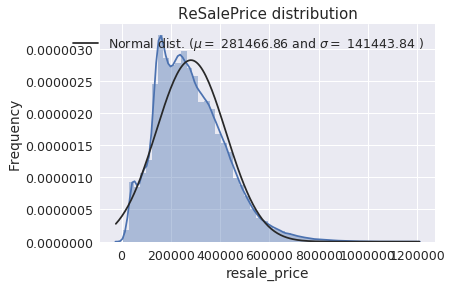

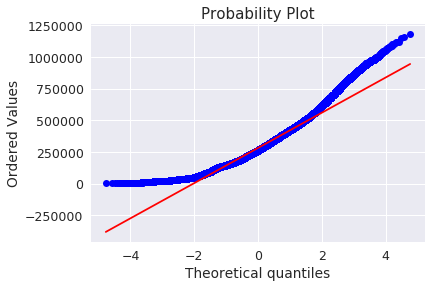

Skewness: 0.767223
Kurtosis: 0.859003


In [100]:
sns.distplot(train_data_hdb['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_hdb['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_hdb['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_hdb['resale_price'].skew())
print("Kurtosis: %f" % train_data_hdb['resale_price'].kurt())

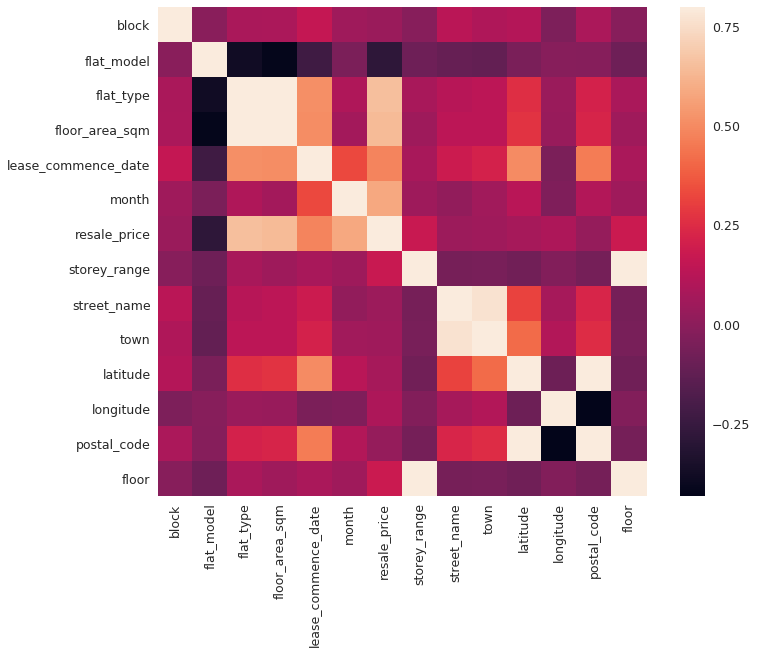

In [101]:
corrmat = train_data_hdb.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [102]:
corrmat

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
block,1.000000,-0.008018,0.084075,0.087837,0.162983,0.054884,0.042314,-0.009237,0.133961,0.099374,0.113405,-0.039828,0.089683,-0.009950
flat_model,-0.008018,1.000000,-0.377441,-0.422379,-0.229126,-0.044797,-0.282617,-0.081528,-0.109917,-0.119660,-0.050747,-0.012658,-0.018329,-0.082304
flat_type,0.084075,-0.377441,1.000000,0.953171,0.511515,0.097055,0.657227,0.082513,0.125755,0.140194,0.259027,0.040956,0.212703,0.086396
floor_area_sqm,0.087837,-0.422379,0.953171,1.000000,0.509694,0.067058,0.642226,0.052727,0.138410,0.138582,0.271726,0.035536,0.223273,0.055828
lease_commence_date,0.162983,-0.229126,0.511515,0.509694,1.000000,0.331787,0.486711,0.081545,0.185888,0.216333,0.504958,-0.043893,0.459532,0.085456
month,0.054884,-0.044797,0.097055,0.067058,0.331787,1.000000,0.586480,0.050991,0.019248,0.061242,0.127839,-0.035594,0.107638,0.054887
resale_price,0.042314,-0.282617,0.657227,0.642226,0.486711,0.586480,1.000000,0.176091,0.044119,0.056490,0.077400,0.093098,0.026075,0.182845
storey_range,-0.009237,-0.081528,0.082513,0.052727,0.081545,0.050991,0.176091,1.000000,-0.060523,-0.054216,-0.074929,-0.026395,-0.062895,0.993737
street_name,0.133961,-0.109917,0.125755,0.138410,0.185888,0.019248,0.044119,-0.060523,1.000000,0.767956,0.314962,0.076264,0.230533,-0.061440
town,0.099374,-0.119660,0.140194,0.138582,0.216333,0.061242,0.056490,-0.054216,0.767956,1.000000,0.418516,0.110627,0.254600,-0.055064


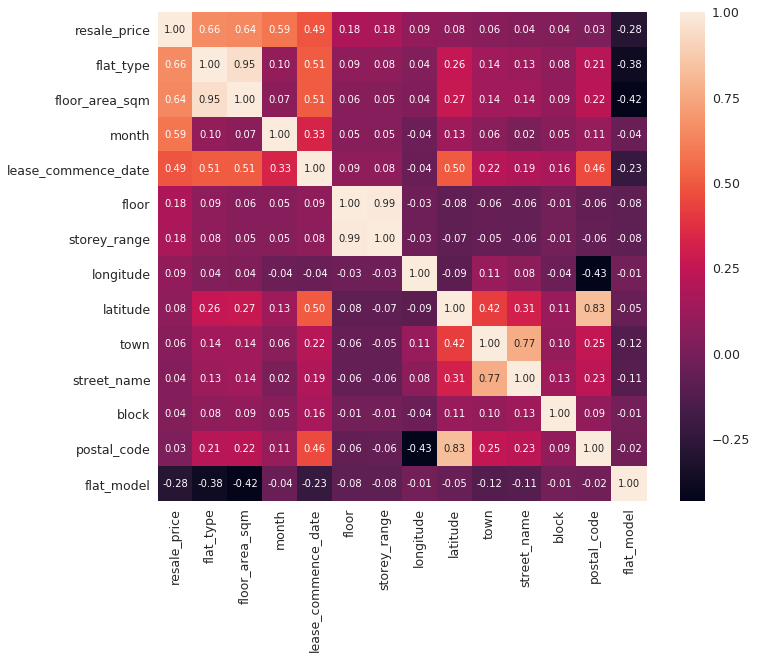

In [103]:
cols = corrmat.nlargest(14, 'resale_price')['resale_price'].index
cm = np.corrcoef(train_data_hdb[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [104]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,flat_type
2,floor_area_sqm
3,month
4,lease_commence_date
5,floor
6,storey_range
7,longitude
8,latitude
9,town


In [105]:
#y = train_data_hdb.resale_price.unique()
#y.sort()
train_data_hdb[train_data_hdb['resale_price'] == 5000]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
6590,1730,5,1,31.0,1975,7,5000.0,1,451,5,142,3349,50,2


In [106]:
y_original = train_data_hdb["resale_price"]

In [107]:
skewed_feats = train_data_hdb.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print skewness

                         Skew
floor                1.086828
storey_range         0.835902
resale_price         0.767222
flat_model           0.473506
flat_type            0.432302
floor_area_sqm       0.390084
lease_commence_date  0.238171
block                0.215167
month                0.213688
latitude             0.186475
postal_code          0.064691
longitude            0.053016
street_name          0.027074
town                -0.078627


In [145]:
skewness_new= skewness[abs(skewness['Skew']) > 0.75]
#print skewness_new
#from scipy.special import boxcox1p, inv_boxcox1p
skewed_features = skewness_new.index
#print skewed_features
for feat in skewed_features:
    if feat != 'resale_price':
        #print feat
        train_data_hdb[feat] = boxcox1p(train_data_hdb[feat], 0.4)


 mu = 1023.76 and sigma = 271.45



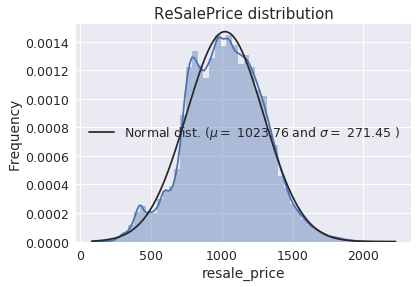

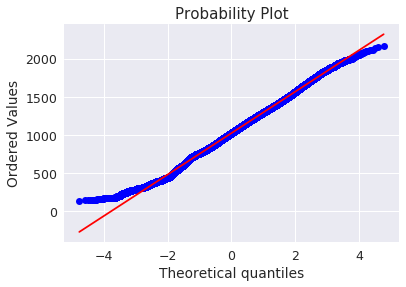

Skewness: -0.009349
Kurtosis: -0.020088


In [108]:
from scipy.special import boxcox1p, inv_boxcox1p
#train_data_hdb["resale_price"] = np.log1p(train_data_hdb["resale_price"])
#train_data_hdb["resale_price"] = np.log(train_data_hdb["resale_price"])
#train_data_hdb["resale_price"] = inv_boxcox1p(train_data_hdb["resale_price"],0.5)
train_data_hdb["resale_price"] = boxcox1p(train_data_hdb["resale_price"], 0.5)

#Check the new distribution 
sns.distplot(train_data_hdb["resale_price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_hdb["resale_price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_hdb["resale_price"], plot=plt)
plt.show()

#y_train = train_data_hdb["resale_price"].values

print("Skewness: %f" % train_data_hdb["resale_price"].skew())
print("Kurtosis: %f" % train_data_hdb["resale_price"].kurt())

In [109]:
train_data_hdb.head(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,740,5,1,31.0,1977,1,187.747200,6,11,1,4745,4429,4824,11
1,740,5,1,31.0,1977,1,152.932243,3,11,1,4745,4429,4824,5
2,740,5,1,31.0,1977,1,176.896618,6,11,1,4745,4429,4824,11
3,740,5,1,31.0,1977,1,152.932243,5,11,1,4745,4429,4824,8
4,403,12,3,73.0,1976,1,432.515822,3,11,1,4824,4236,4547,5
5,388,12,3,67.0,1977,1,426.956874,1,14,1,5050,4240,4542,2
6,346,12,3,67.0,1977,1,407.882910,5,14,1,4995,4373,4535,8
7,467,12,3,67.0,1977,1,387.876904,6,14,1,4871,3962,4562,11
8,467,12,3,67.0,1977,1,398.005000,3,14,1,4871,3962,4562,5
9,462,12,3,67.0,1977,1,431.594280,1,14,1,4986,3993,4559,2


In [110]:
#train_data_hdb = train_data_hdb.drop(['block'],axis=1)
#train_data_hdb = train_data_hdb.drop(['street_name'],axis=1)
#train_data_hdb = train_data_hdb.drop(['storey_range'],axis=1)
#train_data_hdb = train_data_hdb.drop(['postal_code'],axis=1)
#train_data_hdb = train_data_hdb.drop(['floor_area_sqm'],axis=1)
#train_data_hdb = train_data_hdb.drop(['flat_model'],axis=1)
train_data_hdb.head()


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,740,5,1,31.0,1977,1,187.747200,6,11,1,4745,4429,4824,11
1,740,5,1,31.0,1977,1,152.932243,3,11,1,4745,4429,4824,5
2,740,5,1,31.0,1977,1,176.896618,6,11,1,4745,4429,4824,11
3,740,5,1,31.0,1977,1,152.932243,5,11,1,4745,4429,4824,8
4,403,12,3,73.0,1976,1,432.515822,3,11,1,4824,4236,4547,5


In [111]:
trainY = train_data_hdb.resale_price.values
print trainY
train_data_hdb = train_data_hdb.drop(['resale_price'],axis=1)
train_data_hdb.head()

[ 187.74720024  152.93224325  176.89661819 ... 1527.70716152 1558.62679716
 1671.3212483 ]


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,740,5,1,31.0,1977,1,6,11,1,4745,4429,4824,11
1,740,5,1,31.0,1977,1,3,11,1,4745,4429,4824,5
2,740,5,1,31.0,1977,1,6,11,1,4745,4429,4824,11
3,740,5,1,31.0,1977,1,5,11,1,4745,4429,4824,8
4,403,12,3,73.0,1976,1,3,11,1,4824,4236,4547,5


In [112]:
train_data_hdb.shape

(759789, 13)

In [113]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
#import lightgbm as lgb
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [114]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.5, n_estimators=3000,
                             reg_alpha=0.8, reg_lambda=0.7,
                             subsample=0.2, silent=1,
                             random_state =13)

In [115]:
np.random.seed(13)
test_size = .1
X_train, X_test, y_train, y_test = train_test_split(train_data_hdb, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(683810, 13) (683810,) (75979, 13) (75979,)


In [116]:
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train.values)
map_metrics= -cross_val_score(model_xgb, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
#rmse= np.sqrt(-cross_val_score(model_xgb, train_data_hdb.values, trainY, scoring="neg_mean_squared_error", cv = kf))
print map_metrics


[24.53928013 24.66047869 24.59534971 24.6139593  24.63738173 24.74580341
 24.68906027 24.71731383 24.55938003 24.51263595]


In [117]:
#traindf, testdf = train_test_split(X_train, test_size = 0.3)
#xgb.fit(X_train,y_train)



In [118]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1.5, missing=None,
       n_estimators=3000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0.8, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.2)

In [119]:
pred_train = model_xgb.predict(X_train)

In [120]:
pred_train

array([1181.118  , 1067.5845 ,  738.31946, ...,  873.9441 , 1158.4315 ,
        855.0864 ], dtype=float32)

In [121]:
y_train

array([1160.75706835, 1084.27989027,  700.85418118, ...,  874.35837418,
       1129.37261766,  817.75850102])

In [122]:
np.mean(np.abs((y_train - pred_train) / y_train)) * 100

2.2305970225863945

In [123]:
pred_test = model_xgb.predict(X_test)

In [124]:
np.mean(np.abs((y_test - pred_test) / y_test)) * 100

2.649747797269155

In [125]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.1, random_state=1))
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=.9, random_state=3))
#KRR = KernelRidge(alpha=0.2, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [126]:
def mse_cv(model):
    kfold = KFold(10, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [127]:
#print("lasso",mse_cv(lasso))

In [128]:
#print("ENet",mse_cv(ENet))

In [129]:
#print("KRR",mse_cv(KRR))

In [130]:
print("GBoost",mse_cv(GBoost))

('GBoost', array([22.08625932, 22.2692482 , 22.28888549, 22.30267518, 22.20844033,
       22.35035456, 22.25970396, 22.2547991 , 22.21296192, 22.16414353]))


In [131]:
#lasso.fit(X_train,y_train)
#ENet.fit(X_train,y_train)
#pred_lasso = lasso.predict(X_train)
#pred_ENet = ENet.predict(X_train)

In [132]:
#np.mean(np.abs((y_train - pred_lasso) / y_train)) * 100

In [133]:
#np.mean(np.abs((y_train - pred_ENet) / y_train)) * 100

In [134]:
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

2.010007437490053

In [135]:
pred_test_gboost = GBoost.predict(X_test)
np.mean(np.abs((y_test - pred_test_gboost) / y_test)) * 100

2.3938699281698503

In [143]:
np.random.seed(13)
test_size = .1
train_data = pd.read_csv('./data/hdb_train.csv')
#train_data = train_data.drop(['resale_price'],axis=1)
train_data = train_data.drop(train_data[(train_data.latitude>1.4) &\
                                             (train_data.latitude<1.6) & (train_data.longitude>103.6) & (train_data.longitude<103.72)].index)
train_data = train_data.drop(train_data[train_data.longitude >103.98].index)
train_dataY = train_data.resale_price.values

train_data = train_data.drop(['resale_price'],axis=1)
print train_data.head()
X_tr, X_te, y_tr, y_te = train_test_split(train_data, train_dataY, test_size = test_size)
print X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

   index block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0      0   309        IMPROVED    1 ROOM            31.0                 1977   
1      1   309        IMPROVED    1 ROOM            31.0                 1977   
2      2   309        IMPROVED    1 ROOM            31.0                 1977   
3      3   309        IMPROVED    1 ROOM            31.0                 1977   
4      4   216  NEW GENERATION    3 ROOM            73.0                 1976   

     month storey_range       street_name        town  latitude   longitude  \
0  1990-01     10 TO 12  ANG MO KIO AVE 1  ANG MO KIO  1.365029  103.845300   
1  1990-01     04 TO 06  ANG MO KIO AVE 1  ANG MO KIO  1.365029  103.845300   
2  1990-01     10 TO 12  ANG MO KIO AVE 1  ANG MO KIO  1.365029  103.845300   
3  1990-01     07 TO 09  ANG MO KIO AVE 1  ANG MO KIO  1.365029  103.845300   
4  1990-01     04 TO 06  ANG MO KIO AVE 1  ANG MO KIO  1.366197  103.841505   

   postal_code  floor  
0       562309

In [144]:
pred_inv = inv_boxcox1p(pred_train, 0.5)

In [145]:
print pred_inv
print y_tr

[349941.06 286001.75 137017.22 ... 191818.52 336649.3  183648.28]
[338000. 295000. 123500. ... 192000. 320000. 168000.]


In [146]:
np.mean(np.abs((y_tr - pred_inv) / y_tr)) * 100

4.470376387427454

In [147]:
pred_test_inv =inv_boxcox1p(pred_test, 0.5)
np.mean(np.abs((y_te - pred_test_inv) / y_te)) * 100

5.32461533743802

In [148]:
pred_inv_gboost = inv_boxcox1p(pred_Gboost, 0.5)
print pred_inv_gboost

[351066.06458956 289434.98597338 135409.98480702 ... 196436.47485305
 338009.71495146 188108.5805489 ]


In [149]:
np.mean(np.abs((y_tr - pred_inv_gboost) / y_tr)) * 100

4.0313095695075765

In [150]:
pred_test_binv =inv_boxcox1p(pred_test_gboost, 0.5)
np.mean(np.abs((y_te - pred_test_binv) / y_te)) * 100

4.80520530605834

In [151]:
ensemble_train = 0.3*pred_inv + 0.7*pred_inv_gboost
np.mean(np.abs((y_tr - ensemble_train) / y_tr)) * 100

4.062912548313646

In [152]:
ensemble_test = 0.3*pred_test_inv + 0.7*pred_test_binv
np.mean(np.abs((y_te - ensemble_test) / y_te)) * 100

4.8422649489439245

In [153]:
test_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,826,NEW GENERATION,3 ROOM,68.0,1981,334,6,11,1,4525,4770,4597,11
1,737,MODEL A,3 ROOM,70.0,2012,334,5,11,1,4769,4354,4815,8
2,1346,NEW GENERATION,3 ROOM,67.0,1980,334,5,12,1,5276,4985,4747,8
3,1109,NEW GENERATION,3 ROOM,67.0,1979,334,5,12,1,4662,5051,4680,8
4,1055,NEW GENERATION,3 ROOM,67.0,1979,334,5,12,1,4859,4972,4655,8


In [154]:
test_data_hdb['flat_model'] = test_data_hdb.flat_model.apply(lambda x : flat_model_dict[x])


In [155]:
test_data_hdb['flat_type'] = test_data_hdb.flat_type.apply(lambda x : flat_type_dict[x])
test_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,826,12,3,68.0,1981,334,6,11,1,4525,4770,4597,11
1,737,8,3,70.0,2012,334,5,11,1,4769,4354,4815,8
2,1346,12,3,67.0,1980,334,5,12,1,5276,4985,4747,8
3,1109,12,3,67.0,1979,334,5,12,1,4662,5051,4680,8
4,1055,12,3,67.0,1979,334,5,12,1,4859,4972,4655,8


In [156]:
test_data_hdb.shape

(3766, 13)

In [157]:
test_y_xgb = model_xgb.predict(test_data_hdb)
test_y_gboost = GBoost.predict(test_data_hdb)
print test_y_xgb
print test_y_gboost

[1119.172  1293.5741 1076.0553 ... 1596.5459 1566.3848 1658.8027]
[1107.44375528 1314.09747213 1086.35024908 ... 1603.13475245 1565.51294114
 1692.59336556]


In [158]:
test_y_xgb_inv = inv_boxcox1p(test_y_xgb, 0.5)
test_y_gboost_inv = inv_boxcox1p(test_y_gboost, 0.5)
print test_y_xgb_inv
print test_y_gboost_inv

[314255.66 419627.06 290549.8  ... 638836.25 614956.7  689565.44]
[307715.36153057 433027.13903585 296125.5661685  ... 644113.39338457
 614273.20516284 717910.66864986]


In [159]:
ensemble_y = 0.2*test_y_xgb_inv + 0.8*test_y_gboost_inv
print ensemble_y

[309023.42203696 430347.12529118 295010.41777855 ... 643057.96470766
 614409.90006777 712241.62866989]


In [160]:
sub_1 = pd.Series(ensemble_y, name='price')
sub_1.to_csv("./data/submission-4.csv", header=['price'])

In [161]:
sub_2 = pd.Series(test_y_xgb_inv, name='price')
sub_2.to_csv("./data/submission-5.csv", header=['price'])

In [162]:
sub_3= pd.Series(test_y_gboost_inv, name='price')
sub_3.to_csv("./data/submission-6.csv", header=['price'])

In [164]:
GBoost.feature_importances_ 

array([0.08987845, 0.02281937, 0.01900032, 0.09271794, 0.04403367,
       0.27217111, 0.04049166, 0.05131644, 0.02008824, 0.1040134 ,
       0.10401915, 0.09979044, 0.03965981])

In [165]:
X_train.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
508983,1285,5,5,122.0,1986,204,5,282,5,385,3185,558,8
151330,18,17,4,74.0,1970,87,3,181,5,395,3402,575,5
372497,1741,12,3,68.0,1980,149,5,137,10,737,1771,328,8
327728,759,16,4,84.0,1985,135,1,466,11,1708,6794,1592,2
94610,393,12,3,81.0,1977,67,5,14,1,5020,4238,4543,8


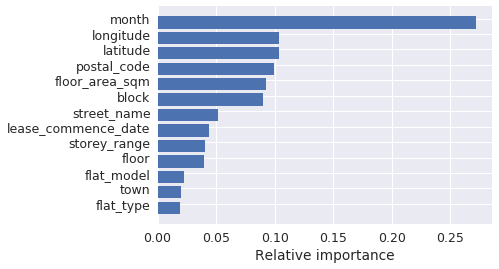

In [168]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

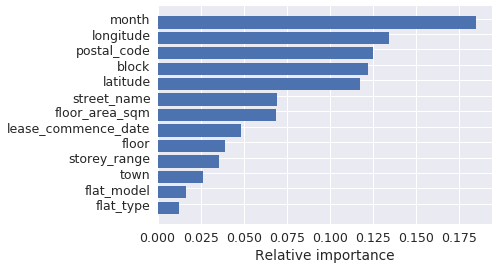

In [169]:
indices = np.argsort(model_xgb.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), model_xgb.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
'max_depth': [6,10,14],
'min_samples_leaf': [3, 5, 9, 17],
 'max_features': [1.0, 'log2', 'auto', 'sqrt'] 
}

est = GradientBoostingRegressor(n_estimators=300)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train,y_train)

# best hyperparameter setting
gs_cv.best_params_

/home/thebeast/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/thebeast/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
